In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ukb_pheno_dict = {
    'p20116': 'SMOKE',
    'p20117': 'DRINK'
}

In [14]:
ctsleb_res_1 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/ctsleb/prs_binary_metrics.csv")
tlprs_res_1 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/tlprs/prs_binary_metrics.csv")
# display(ctsleb_res_1)
# display(tlprs_res_1)
columns = ['auc_median', 'auc_CI_lower', 'auc_CI_upper', 'pr_auc_median',
       'pr_auc_CI_lower', 'pr_auc_CI_upper', 'trait', 'method', 'pheno']
group_res_1 = []
# 处理 ctsleb_res_1
for trait, name in ukb_pheno_dict.items():
    trait_name = f'{trait}_int'
    ctsleb_group = ctsleb_res_1[ctsleb_res_1['trait'] == trait_name]
    auc_median = ctsleb_group['auc'].median()
    auc_ci_lower = ctsleb_group['auc'].quantile(0.025)
    auc_ci_upper = ctsleb_group['auc'].quantile(0.975)
    pr_auc_median = ctsleb_group['pr_auc'].median()
    pr_auc_ci_lower = ctsleb_group['pr_auc'].quantile(0.025)
    pr_auc_ci_upper = ctsleb_group['pr_auc'].quantile(0.975)
    group_res_1.append({
        'auc_median': auc_median,
        'auc_CI_lower': auc_ci_lower,
        'auc_CI_upper': auc_ci_upper,
        'pr_auc_median': pr_auc_median,
        'pr_auc_CI_lower': pr_auc_ci_lower,
        'pr_auc_CI_upper': pr_auc_ci_upper,
        'trait': name,
        'method': 'CT-SLEB',
        'pheno': trait
    })
# 处理 tlprs_res_1
for trait, name in ukb_pheno_dict.items():
    trait_name = f'{trait}_int'
    tlprs_group = tlprs_res_1[tlprs_res_1['trait'] == trait_name]
    auc_median = tlprs_group['auc'].median()
    auc_ci_lower = tlprs_group['auc'].quantile(0.025)
    auc_ci_upper = tlprs_group['auc'].quantile(0.975)
    pr_auc_median = tlprs_group['pr_auc'].median()
    pr_auc_ci_lower = tlprs_group['pr_auc'].quantile(0.025)
    pr_auc_ci_upper = tlprs_group['pr_auc'].quantile(0.975)
    group_res_1.append({
        'auc_median': auc_median,
        'auc_CI_lower': auc_ci_lower,
        'auc_CI_upper': auc_ci_upper,
        'pr_auc_median': pr_auc_median,
        'pr_auc_CI_lower': pr_auc_ci_lower,
        'pr_auc_CI_upper': pr_auc_ci_upper,
        'trait': name,
        'method': 'TLPRS',
        'pheno': trait
    })

# 将结果转换为 DataFrame
group_res_1 = pd.DataFrame(group_res_1, columns=columns)
display(group_res_1)

,auc_median,auc_CI_lower,auc_CI_upper,pr_auc_median,pr_auc_CI_lower,pr_auc_CI_upper,trait,method,pheno
0,0.711030,0.711008,0.711041,0.177443,0.177428,0.177452,SMOKE,CT-SLEB,p20116
1,0.599090,0.599069,0.599110,0.793141,0.793129,0.793152,DRINK,CT-SLEB,p20117
2,0.710978,0.710570,0.711030,0.177443,0.177071,0.177679,SMOKE,TLPRS,p20116
3,0.599103,0.596241,0.599133,0.793191,0.793078,0.793490,DRINK,TLPRS,p20117


In [15]:
prscsx_res_1 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/prscsx/prs_binary_metrics_with_ci.csv")
xpass_res_1 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/xpass/prs_binary_metrics_with_ci.csv")
sdprx_res_1 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/sdprx/prs_binary_metrics_with_ci.csv")

# category_map = pd.read_csv("category_map.tsv", sep='\t')
# category_map = category_map.rename(columns={"short_name": "pheno"})

prscsx_res_1["method"] = "PRS-CSx"
xpass_res_1["method"] = "XPASS"
sdprx_res_1["method"] = "SDPRX"

merge_res = pd.concat([prscsx_res_1, xpass_res_1,sdprx_res_1, group_res_1], ignore_index=True)
merge_res["trait"] = merge_res["trait"].apply(lambda x: x.replace("_int", "").replace("_raw", ""))
merge_res["pheno"] = merge_res["trait"].apply(lambda x: ukb_pheno_dict.get(x, x))
# Merge with category map to get phenotype names
# merge_res = merge_res.merge(category_map, on="pheno", how="left")
# # sort by phenotype
# merge_res = merge_res.sort_values(by=["category","pheno"])
# merge_res = merge_res.dropna(subset=["category"])
display(merge_res)
print(merge_res.columns)

,auc_median,auc_CI_lower,auc_CI_upper,pr_auc_median,pr_auc_CI_lower,pr_auc_CI_upper,or_per_sd_median,or_per_sd_CI_lower,or_per_sd_CI_upper,OR_Quintile_1_median,...,OR_Quintile_3_CI_upper,OR_Quintile_4_median,OR_Quintile_4_CI_lower,OR_Quintile_4_CI_upper,OR_Quintile_5_median,OR_Quintile_5_CI_lower,OR_Quintile_5_CI_upper,trait,method,pheno
0,0.731415,0.679002,0.777498,0.213123,0.149189,0.283056,0.921982,0.765691,1.097555,0.790979,...,1.0,0.917344,0.426254,1.773636,0.665090,0.289702,1.350187,p20116,PRS-CSx,SMOKE
1,0.610405,0.578311,0.643923,0.800519,0.768583,0.829135,0.788275,0.696565,0.885717,1.290977,...,1.0,0.855217,0.589887,1.282480,0.697378,0.489100,1.016627,p20117,PRS-CSx,DRINK
2,0.731347,0.684735,0.775404,0.212794,0.149236,0.292390,1.281608,1.051194,1.587236,0.841729,...,1.0,1.285074,0.650377,2.616704,1.767562,0.932605,3.404835,p20116,XPASS,SMOKE
3,0.611095,0.579038,0.643271,0.801238,0.771897,0.829890,0.996818,0.886752,1.123886,1.062362,...,1.0,1.100059,0.725948,1.622866,1.150712,0.766127,1.746845,p20117,XPASS,DRINK
4,0.730863,0.680982,0.777133,0.213051,0.155379,0.288606,1.152238,0.995550,1.330449,0.690403,...,1.0,0.924637,0.426913,2.033580,1.188978,0.605645,2.605931,p20116,SDPRX,SMOKE
5,0.611685,0.581721,0.642098,0.801936,0.773634,0.827300,1.021834,0.917731,1.156060,1.099735,...,1.0,1.089698,0.730543,1.642079,1.087382,0.725496,1.626469,p20117,SDPRX,DRINK
6,0.711030,0.711008,0.711041,0.177443,0.177428,0.177452,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMOKE,CT-SLEB,SMOKE
7,0.599090,0.599069,0.599110,0.793141,0.793129,0.793152,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DRINK,CT-SLEB,DRINK
8,0.710978,0.710570,0.711030,0.177443,0.177071,0.177679,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMOKE,TLPRS,SMOKE
9,0.599103,0.596241,0.599133,0.793191,0.793078,0.793490,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DRINK,TLPRS,DRINK


Index(['auc_median', 'auc_CI_lower', 'auc_CI_upper', 'pr_auc_median',
       'pr_auc_CI_lower', 'pr_auc_CI_upper', 'or_per_sd_median',
       'or_per_sd_CI_lower', 'or_per_sd_CI_upper', 'OR_Quintile_1_median',
       'OR_Quintile_1_CI_lower', 'OR_Quintile_1_CI_upper',
       'OR_Quintile_2_median', 'OR_Quintile_2_CI_lower',
       'OR_Quintile_2_CI_upper', 'OR_Quintile_3_median',
       'OR_Quintile_3_CI_lower', 'OR_Quintile_3_CI_upper',
       'OR_Quintile_4_median', 'OR_Quintile_4_CI_lower',
       'OR_Quintile_4_CI_upper', 'OR_Quintile_5_median',
       'OR_Quintile_5_CI_lower', 'OR_Quintile_5_CI_upper', 'trait', 'method',
       'pheno'],
      dtype='object')


--- 用于绘图的模拟数据 ---
   auc_median  auc_CI_lower  auc_CI_upper  pr_auc_median  pr_auc_CI_lower  \
0    0.731415      0.679002      0.777498       0.213123         0.149189   
1    0.610405      0.578311      0.643923       0.800519         0.768583   
2    0.731347      0.684735      0.775404       0.212794         0.149236   
3    0.611095      0.579038      0.643271       0.801238         0.771897   
4    0.730863      0.680982      0.777133       0.213051         0.155379   

   pr_auc_CI_upper  or_per_sd_median  or_per_sd_CI_lower  or_per_sd_CI_upper  \
0         0.283056          0.921982            0.765691            1.097555   
1         0.829135          0.788275            0.696565            0.885717   
2         0.292390          1.281608            1.051194            1.587236   
3         0.829890          0.996818            0.886752            1.123886   
4         0.288606          1.152238            0.995550            1.330449   

   OR_Quintile_1_median  ...  OR_Quint

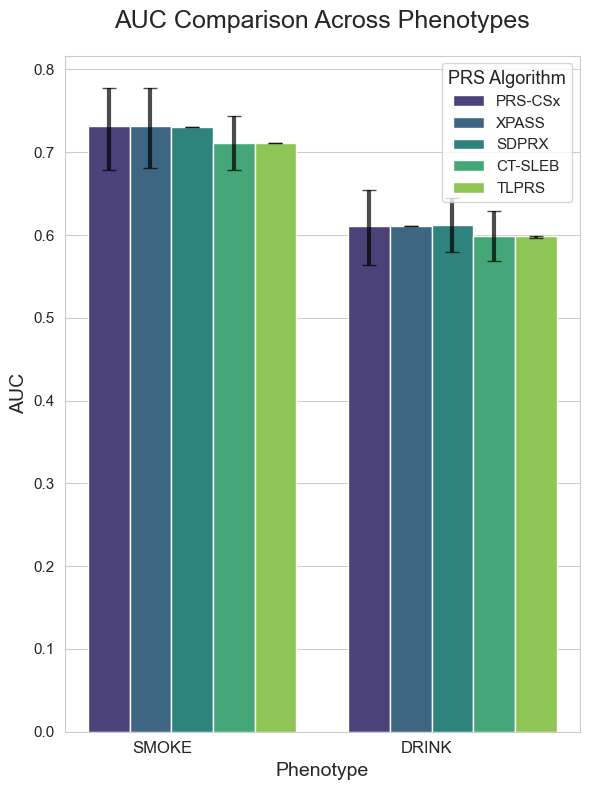

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# --- 1. 准备数据 ---
# 在您的实际应用中，您会从一个文件中加载计算好的结果
# 例如: df = pd.read_csv('my_prs_results.csv')
#
# 为了演示，我们这里创建一个模拟的DataFrame。
# 您的真实数据应该整理成下面这种“长格式”。

print("--- 用于绘图的模拟数据 ---")
print(merge_res.head())


# --- 2. 开始绘图 ---

# 设置绘图风格和字体，确保中文能够正确显示
sns.set_style("whitegrid")
# plt.rcParams['font.sans-serif'] = ['SimHei'] # 'SimHei' 是常用的黑体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# 创建一个图形和坐标轴，设置合适的尺寸
fig, ax = plt.subplots(figsize=(6, 8))

# 使用seaborn绘制分组柱状图
# x: x轴类别 (表型)
# y: y轴数值 (增量R²)
# hue: 分组的类别 (方法)
# data: 输入的DataFrame
barplot = sns.barplot(
    x='pheno',
    y='auc_median',
    hue='method',
    data=merge_res,
    palette='viridis', # 'viridis', 'muted', 'colorblind' 都是不错的色板
    ax=ax,
    # Seaborn 1.12.0+ 支持直接传入误差数据，但手动添加更灵活
    errorbar=None, # 关闭默认的误差棒
)

# --- 3. 手动添加自定义的误差棒 ---
# 这种方法能精确控制非对称的误差棒，是更严谨的做法
# 获取条形的位置
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]

# 重新排序数据以匹配条形图的顺序
plot_order = merge_res.groupby(['pheno', 'method']).groups.keys()

errors = {}
for trait, method in plot_order:
    row = merge_res[(merge_res['pheno'] == trait) & (merge_res['method'] == method)]
    if not row.empty:
        # print(f"Processing trait: {trait}, method: {method}")
        median = row['auc_median'].iloc[0]
        ci_lower = row['auc_CI_lower'].iloc[0]
        ci_upper = row['auc_CI_upper'].iloc[0]
        # print(f"Median: {median}, CI Lower: {ci_lower}, CI Upper: {ci_upper}")
        # if the ci_lower will be less than 0, set it to 0
        if ci_lower < 0:
            ci_lower = 0
        # if the ci_upper will be less than 0, set it to 0
        if ci_upper < 0:
            ci_upper = 0
        if median - ci_lower < 0:
            errors[(trait, method)] = [0, ci_upper - median]
        elif ci_upper - median < 0:
            errors[(trait, method)] = [median - ci_lower, 0]
        else:
            errors[(trait, method)] = [median - ci_lower, ci_upper - median]

# 从ax.get_xticklabels()获取正确的trait顺序
trait_order = [tick.get_text() for tick in ax.get_xticklabels()]
software_order = [text.get_text() for text in ax.legend_.get_texts()]

err_values = []
for trait in trait_order:
    for software in software_order:
        print(f"Trait: {trait}, Software: {software}")
        err_values.append(errors.get((trait, software), [0, 0]))

err_values = np.array(err_values).T
print(err_values)
ax.errorbar(
    x=x_coords,
    y=y_coords,
    yerr=err_values,
    fmt='none', # 不显示数据点
    capsize=5, # 误差线顶端横线长度
    color='black',
    elinewidth=3, # 误差线宽度
    linestyle='none', # 不显示误差线的线型
    alpha=0.7, # 误差线透明度
)

# --- 4. 美化与调整 ---

# 设置x轴的标签旋转角度，避免重叠
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# 对于不同的category，对x轴标签进行分组显示
# 这里假设您的DataFrame中有一个'category'列来区分不同
# 根据分组标签改变Y轴标签的颜色
# for label in ax.get_xticklabels():
#     trait_name = label.get_text()
#     # 根据类别设置标签颜色
#     category = merge_res.loc[merge_res['pheno'] == trait_name, 'category'].values[0]
#     label.set_color('#073B4C' if category == 'Blood biochemistry' else '#118AB2' if category == 'Body size measures' else '#E07A5F' if category == "Blood count" else "#EF476F" if category == "Blood pressure" else "#06D6A0")

# legend_elements = [
#     Line2D([0], [0], color='#073B4C', lw=4, label='Blood biochemistry'),
#     Line2D([0], [0], color='#118AB2', lw=4, label='Body size measures'),
#     Line2D([0], [0], color='#E07A5F', lw=4, label='Blood count'),
#     Line2D([0], [0], color='#EF476F', lw=4, label='Blood pressure'),
# ]
# ax.add_artist(ax.legend(handles=legend_elements, loc='center left', fontsize=10, title='Trait Categories/PRS Algorithm', title_fontsize='11', bbox_to_anchor=(0, 0.74)))
# 设置Y轴的格式，转为百分比显示更直观
# ax.set_yticklabels([f'{y*100:.1f}%' for y in ax.get_yticks()])


ax.set_title(r'AUC Comparison Across Phenotypes', fontsize=18, pad=20)
ax.set_xlabel('Phenotype', fontsize=14)
ax.set_ylabel(r'AUC', fontsize=14)

# set y-axis label at the center


# # 调整图例
# # 再加一张图例，显示不同的PRS算法
# legend_elements = [
#     Line2D([0], [0], color='blue', lw=4, label='PRS-CSx'),
#     Line2D([0], [0], color='orange', lw=4, label='XPASS'),
# ]
# ax.legend(handles=legend_elements, title='PRS Algorithm', fontsize=11, title_fontsize='13')
ax.legend(title='PRS Algorithm', title_fontsize='13', fontsize='11')

# 调整坐标轴刻度标签的字体大小
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)

# 确保布局紧凑
plt.tight_layout()

# 保存图形（可选）
# plt.savefig('incremental_r2_comparison.png', dpi=300)

# 显示图形
plt.show()

--- 用于绘图的模拟数据 ---
   auc_median  auc_CI_lower  auc_CI_upper  pr_auc_median  pr_auc_CI_lower  \
0    0.731415      0.679002      0.777498       0.213123         0.149189   
1    0.610405      0.578311      0.643923       0.800519         0.768583   
2    0.731347      0.684735      0.775404       0.212794         0.149236   
3    0.611095      0.579038      0.643271       0.801238         0.771897   
4    0.730863      0.680982      0.777133       0.213051         0.155379   

   pr_auc_CI_upper  or_per_sd_median  or_per_sd_CI_lower  or_per_sd_CI_upper  \
0         0.283056          0.921982            0.765691            1.097555   
1         0.829135          0.788275            0.696565            0.885717   
2         0.292390          1.281608            1.051194            1.587236   
3         0.829890          0.996818            0.886752            1.123886   
4         0.288606          1.152238            0.995550            1.330449   

   OR_Quintile_1_median  ...  OR_Quint

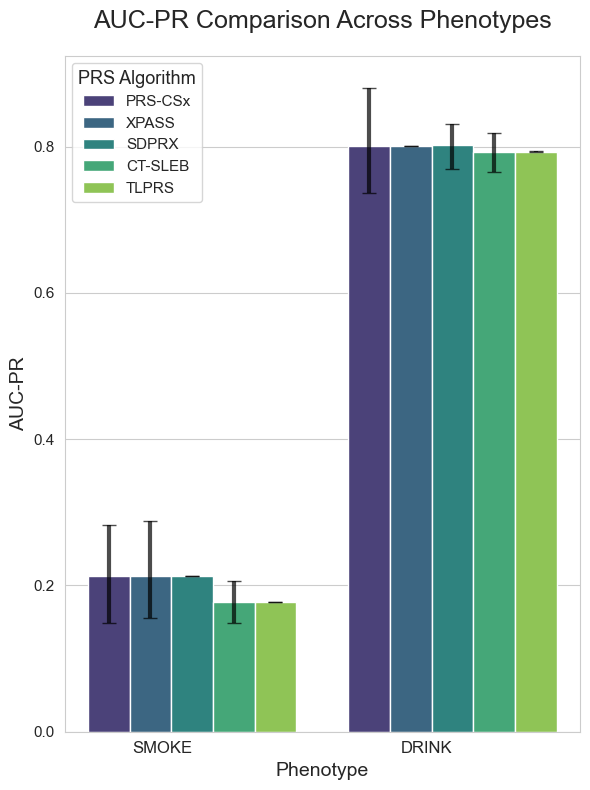

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# --- 1. 准备数据 ---
# 在您的实际应用中，您会从一个文件中加载计算好的结果
# 例如: df = pd.read_csv('my_prs_results.csv')
#
# 为了演示，我们这里创建一个模拟的DataFrame。
# 您的真实数据应该整理成下面这种“长格式”。

print("--- 用于绘图的模拟数据 ---")
print(merge_res.head())


# --- 2. 开始绘图 ---

# 设置绘图风格和字体，确保中文能够正确显示
sns.set_style("whitegrid")
# plt.rcParams['font.sans-serif'] = ['SimHei'] # 'SimHei' 是常用的黑体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# 创建一个图形和坐标轴，设置合适的尺寸
fig, ax = plt.subplots(figsize=(6, 8))

# 使用seaborn绘制分组柱状图
# x: x轴类别 (表型)
# y: y轴数值 (增量R²)
# hue: 分组的类别 (方法)
# data: 输入的DataFrame
barplot = sns.barplot(
    x='pheno',
    y='pr_auc_median',
    hue='method',
    data=merge_res,
    palette='viridis', # 'viridis', 'muted', 'colorblind' 都是不错的色板
    ax=ax,
    # Seaborn 1.12.0+ 支持直接传入误差数据，但手动添加更灵活
    errorbar=None, # 关闭默认的误差棒
)

# --- 3. 手动添加自定义的误差棒 ---
# 这种方法能精确控制非对称的误差棒，是更严谨的做法
# 获取条形的位置
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]

# 重新排序数据以匹配条形图的顺序
plot_order = merge_res.groupby(['pheno', 'method']).groups.keys()

errors = {}
for trait, method in plot_order:
    row = merge_res[(merge_res['pheno'] == trait) & (merge_res['method'] == method)]
    if not row.empty:
        # print(f"Processing trait: {trait}, method: {method}")
        median = row['pr_auc_median'].iloc[0]
        ci_lower = row['pr_auc_CI_lower'].iloc[0]
        ci_upper = row['pr_auc_CI_upper'].iloc[0]
        # print(f"Median: {median}, CI Lower: {ci_lower}, CI Upper: {ci_upper}")
        # if the ci_lower will be less than 0, set it to 0
        if ci_lower < 0:
            ci_lower = 0
        # if the ci_upper will be less than 0, set it to 0
        if ci_upper < 0:
            ci_upper = 0
        if median - ci_lower < 0:
            errors[(trait, method)] = [0, ci_upper - median]
        elif ci_upper - median < 0:
            errors[(trait, method)] = [median - ci_lower, 0]
        else:
            errors[(trait, method)] = [median - ci_lower, ci_upper - median]

# 从ax.get_xticklabels()获取正确的trait顺序
trait_order = [tick.get_text() for tick in ax.get_xticklabels()]
software_order = [text.get_text() for text in ax.legend_.get_texts()]

err_values = []
for trait in trait_order:
    for software in software_order:
        print(f"Trait: {trait}, Software: {software}")
        err_values.append(errors.get((trait, software), [0, 0]))

err_values = np.array(err_values).T
print(err_values)
ax.errorbar(
    x=x_coords,
    y=y_coords,
    yerr=err_values,
    fmt='none', # 不显示数据点
    capsize=5, # 误差线顶端横线长度
    color='black',
    elinewidth=3, # 误差线宽度
    linestyle='none', # 不显示误差线的线型
    alpha=0.7, # 误差线透明度
)

# --- 4. 美化与调整 ---

# 设置x轴的标签旋转角度，避免重叠
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# 对于不同的category，对x轴标签进行分组显示
# 这里假设您的DataFrame中有一个'category'列来区分不同
# 根据分组标签改变Y轴标签的颜色
# for label in ax.get_xticklabels():
#     trait_name = label.get_text()
#     # 根据类别设置标签颜色
#     category = merge_res.loc[merge_res['pheno'] == trait_name, 'category'].values[0]
#     label.set_color('#073B4C' if category == 'Blood biochemistry' else '#118AB2' if category == 'Body size measures' else '#E07A5F' if category == "Blood count" else "#EF476F" if category == "Blood pressure" else "#06D6A0")

# legend_elements = [
#     Line2D([0], [0], color='#073B4C', lw=4, label='Blood biochemistry'),
#     Line2D([0], [0], color='#118AB2', lw=4, label='Body size measures'),
#     Line2D([0], [0], color='#E07A5F', lw=4, label='Blood count'),
#     Line2D([0], [0], color='#EF476F', lw=4, label='Blood pressure'),
# ]
# ax.add_artist(ax.legend(handles=legend_elements, loc='center left', fontsize=10, title='Trait Categories/PRS Algorithm', title_fontsize='11', bbox_to_anchor=(0, 0.74)))
# 设置Y轴的格式，转为百分比显示更直观
# ax.set_yticklabels([f'{y*100:.1f}%' for y in ax.get_yticks()])


ax.set_title(r'AUC-PR Comparison Across Phenotypes', fontsize=18, pad=20)
ax.set_xlabel('Phenotype', fontsize=14)
ax.set_ylabel(r'AUC-PR', fontsize=14)

# set y-axis label at the center


# # 调整图例
# # 再加一张图例，显示不同的PRS算法
# legend_elements = [
#     Line2D([0], [0], color='blue', lw=4, label='PRS-CSx'),
#     Line2D([0], [0], color='orange', lw=4, label='XPASS'),
# ]
# ax.legend(handles=legend_elements, title='PRS Algorithm', fontsize=11, title_fontsize='13')
ax.legend(title='PRS Algorithm', title_fontsize='13', fontsize='11')

# 调整坐标轴刻度标签的字体大小
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)

# 确保布局紧凑
plt.tight_layout()

# 保存图形（可选）
# plt.savefig('incremental_r2_comparison.png', dpi=300)

# 显示图形
plt.show()